In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import *
from geopy.geocoders import Nominatim
import folium
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 기본

In [50]:
df_price_non_NAN = pd.read_csv('./data/가격대 결측값 제거 맛집 데이터.csv')

In [54]:
a=df_price_non_NAN['가격대']==' 만원 미만'

total=df_price_non_NAN[a]['맛있다수'].sum()+df_price_non_NAN[a]['괜찮다수'].sum()+df_price_non_NAN[a]['별로다수'].sum()
good=round(df_price_non_NAN[a]['맛있다수'].sum()/total,2)
not_bad=round(df_price_non_NAN[a]['괜찮다수'].sum()/total,2)
soso=round(df_price_non_NAN[a]['별로다수'].sum()/total,2)

a_list=[good,not_bad,soso]
######################################################

f=df_price_non_NAN['가격대']==' 만원-2만원'

total=df_price_non_NAN[f]['맛있다수'].sum()+df_price_non_NAN[f]['괜찮다수'].sum()+df_price_non_NAN[f]['별로다수'].sum()
good=round(df_price_non_NAN[f]['맛있다수'].sum()/total,2)
not_bad=round(df_price_non_NAN[f]['괜찮다수'].sum()/total,2)
soso=round(df_price_non_NAN[f]['별로다수'].sum()/total,2)

f_list=[good,not_bad,soso]

######################################################

b=df_price_non_NAN['가격대']==' 2만원-3만원'

total=df_price_non_NAN[b]['맛있다수'].sum()+df_price_non_NAN[b]['괜찮다수'].sum()+df_price_non_NAN[b]['별로다수'].sum()
good=round(df_price_non_NAN[b]['맛있다수'].sum()/total,2)
not_bad=round(df_price_non_NAN[b]['괜찮다수'].sum()/total,2)
soso=round(df_price_non_NAN[b]['별로다수'].sum()/total,2)

b_list=[good,not_bad,soso]

######################################################

d=df_price_non_NAN['가격대']==' 3만원-4만원'

total=df_price_non_NAN[d]['맛있다수'].sum()+df_price_non_NAN[d]['괜찮다수'].sum()+df_price_non_NAN[d]['별로다수'].sum()
good=round(df_price_non_NAN[d]['맛있다수'].sum()/total,2)
not_bad=round(df_price_non_NAN[d]['괜찮다수'].sum()/total,2)
soso=round(df_price_non_NAN[d]['별로다수'].sum()/total,2)

d_list=[good,not_bad,soso]

######################################################

c=df_price_non_NAN['가격대']==' 4만원 이상'

total=df_price_non_NAN[c]['맛있다수'].sum()+df_price_non_NAN[c]['괜찮다수'].sum()+df_price_non_NAN[c]['별로다수'].sum()
good=round(df_price_non_NAN[c]['맛있다수'].sum()/total,2)
not_bad=round(df_price_non_NAN[c]['괜찮다수'].sum()/total,2)
soso=round(df_price_non_NAN[c]['별로다수'].sum()/total,2)

c_list=[good,not_bad,soso]

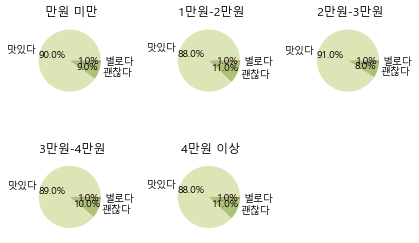

In [52]:
labels=['맛있다','괜찮다','별로다']
colors = ["#dde5b6", "#adc178", "#a98467"]

#만원 미만
plt.subplot(231)
ratio=a_list
plt.title(' 만원 미만')
plt.pie(ratio,labels=labels,autopct='%.1f%%',colors=colors)

#만원 미만
plt.subplot(232)
ratio=f_list
plt.title(' 1만원-2만원')
plt.pie(ratio,labels=labels,autopct='%.1f%%',colors=colors)


#2만원-3만원
plt.subplot(233)
ratio=b_list
plt.title(' 2만원-3만원')
plt.pie(ratio,labels=labels,autopct='%.1f%%',colors=colors)


#3만원-4만원
plt.subplot(234)
ratio=d_list
plt.title(' 3만원-4만원')
plt.pie(ratio,labels=labels,autopct='%.1f%%',colors=colors)

#4만원 이상
plt.subplot(235)
ratio=c_list
plt.title(' 4만원 이상')
plt.pie(ratio,labels=labels,autopct='%.1f%%',colors=colors)


plt.tight_layout(pad=1.5)

In [55]:
#가격대 평균 평점

a=df_price_non_NAN['가격대']==' 만원 미만'
a_m=df_price_non_NAN[a]['최종평점'].mean()

b=df_price_non_NAN['가격대']==' 만원-2만원'
b_m=df_price_non_NAN[b]['최종평점'].mean()

c=df_price_non_NAN['가격대']==' 2만원-3만원'
c_m=df_price_non_NAN[c]['최종평점'].mean()

d=df_price_non_NAN['가격대']==' 4만원 이상'
d_m=df_price_non_NAN[d]['최종평점'].mean()

e=df_price_non_NAN['가격대']==' 3만원-4만원'
e_m=df_price_non_NAN[e]['최종평점'].mean()

bar_list=[a_m,b_m,c_m,e_m,d_m]

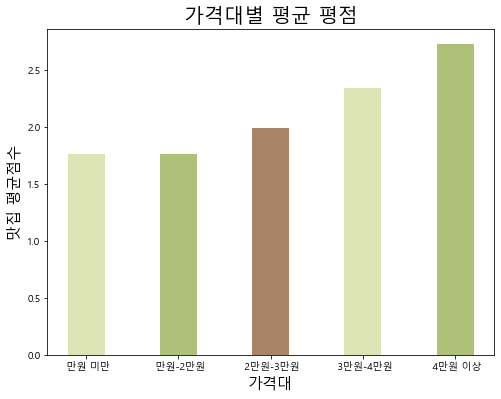

In [56]:
# #bar chart
x=[' 만원 미만', ' 만원-2만원', ' 2만원-3만원',' 3만원-4만원', ' 4만원 이상']
y=bar_list

plt.figure(figsize=(8,6))
plt.title('가격대별 평균 평점',fontsize=20)
plt.xlabel('가격대',fontsize=15)
plt.ylabel('맛집 평균점수',fontsize=15)

colors = ["#dde5b6", "#adc178", "#a98467"]
plt.bar(x,y,color=colors,width=0.4)

plt.show()

In [76]:
df_price_score = pd.read_csv('./data/가격대별맛집가격점수.csv')
df_price_score.drop('Unnamed: 0', axis=1, inplace = True)

<BarContainer object of 25 artists>

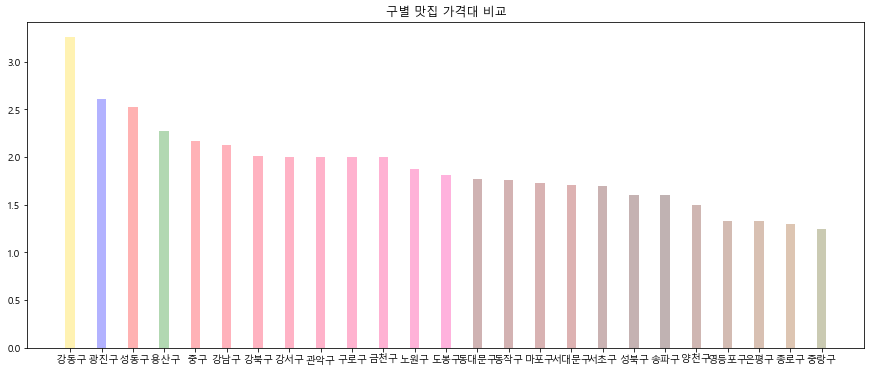

In [159]:
view = df_price_score[['구','가격 점수']]
y=view['구']
x=view['가격 점수'].sort_values(ascending = False)

xlabel=x
plt.figure(figsize=(15,6))
plt.title('구별 맛집 가격대 비교')
# x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] #xticks 시 위치 표시에 사용할 변수
plt.bar(y,x, width=0.3, color = ['gold', 'b', '#FF0000', 'green','#FF0010','#FF0020','#FF0030',\
                                 '#FF0040','#FF0050','#FF0060','#FF0070','#FF0080','#FF0090',\
                                 '#600000','#700000','#800000','#900000','#500000','#400000','#300000',\
                                '#601000','#702000','#803000','#904000','#505000'], alpha = 0.3)

In [148]:
view['구'] = view['구'].str.replace(' ','')
view.index = view.구
del view['구']

C:\Users\HYUNJIN\AppData\Local\Temp\ipykernel_2420\2006780442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view['구'] = view['구'].str.replace(' ','')


In [94]:
geo_path='./data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))
# geo_str

#서울을 중심으로 기본 지도 출력
#위경도[37.5502,126.982]
map=folium.Map(location=[37.5502,126.982],
               zoom_start=11,)
               #tiles='Stamen Terrain')
f_test=view
map.choropleth(geo_data=geo_str,
               data=f_test,
               columns=[f_test.index,'가격 점수'],
               key_on = 'feature.id',
               fill_color='BuPu',
               legend_name='구 별 가격점수')
folium.LayerControl().add_to(map)
map

D:\Programming\Editor\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [124]:
df_price_score1 = pd.read_csv('./data/가격대별맛집수와가격점수.csv')

In [125]:
view_df = df_price_score1[['가격 점수', '구']]
#view_df['구'] = view_df.index
view_df.reset_index(inplace=True, drop=True)

<BarContainer object of 25 artists>

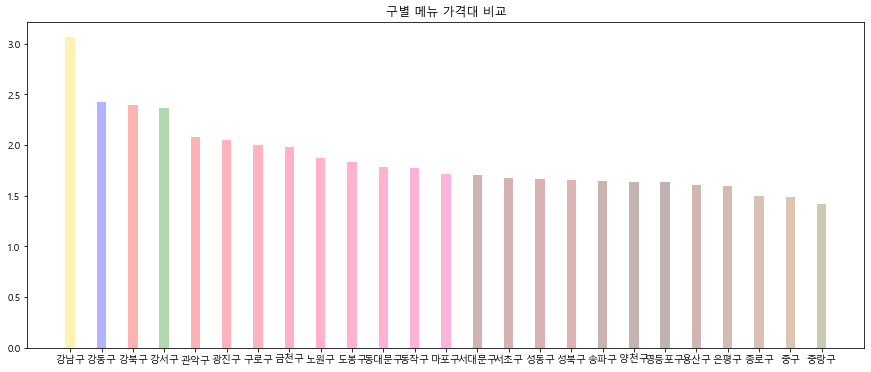

In [160]:
x = view_df['가격 점수'].sort_values(ascending = False)
y = view_df['구']

xlabel = y
plt.figure(figsize=(15,6))
plt.title('구별 메뉴 가격대 비교')
# x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] #xticks 시 위치 표시에 사용할 변수
plt.bar(y,x, width=0.3, color = ['gold', 'b', '#FF0000', 'green','#FF0010','#FF0020','#FF0030',\
                                 '#FF0040','#FF0050','#FF0060','#FF0070','#FF0080','#FF0090',\
                                 '#600000','#700000','#800000','#900000','#500000','#400000','#300000',\
                                '#601000','#702000','#803000','#904000','#505000'], alpha = 0.3)

In [120]:
view_df['구'] = view_df['구'].str.replace(' ','')
view_df.index = view_df.구
del view_df['구']

C:\Users\HYUNJIN\AppData\Local\Temp\ipykernel_2420\4154142025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view_df['구'] = view_df['구'].str.replace(' ','')


In [122]:
geo_path='./data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))
# geo_str

#서울을 중심으로 기본 지도 출력
#위경도[37.5502,126.982]
map=folium.Map(location=[37.5502,126.982],
               zoom_start=11,)
               #tiles='Stamen Terrain')
f_test=view_df
map.choropleth(geo_data=geo_str,
               data=f_test,
               columns=[f_test.index,'가격 점수'],
               key_on = 'feature.id',
               fill_color='BuPu',
               legend_name='구 별 가격점수')
folium.LayerControl().add_to(map)
map

In [62]:
df = pd.read_csv('./data/data_set/맛집 데이터 3.5 이상.csv')

In [63]:
A = df[df['가격대'] == '0'].index
df.drop(A,axis='index',inplace=True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000


<AxesSubplot:title={'center':'구별 맛집 수'}, xlabel='count', ylabel='구'>

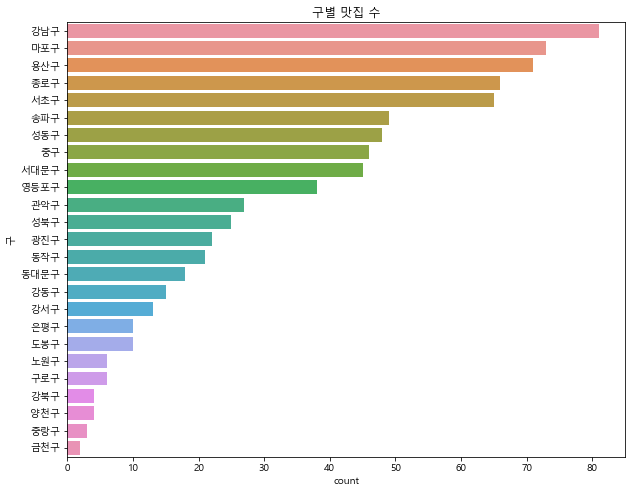

In [143]:
plt.figure(figsize=(10,8))
plt.title('구별 맛집 수')
plt.xlabel('맛집수')
plt.ylabel('도시')
sns.countplot(y="구", data=df, order = df['구'].value_counts().index)

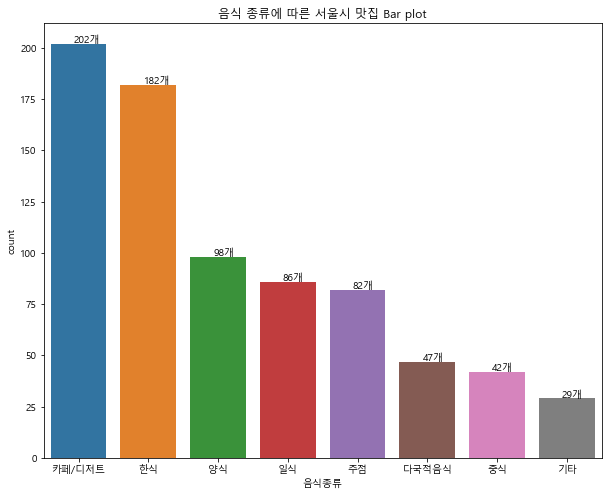

In [22]:
ordered_index = df.value_counts('음식종류').index
plt.figure(figsize=(10, 8))
ax1 = sns.countplot(x='음식종류', data=df, order=ordered_index)

plt.title('음식 종류에 따른 서울시 맛집 Bar plot')
plt.xlabel('음식종류')

    
for p in ax1.patches:
    ax1.annotate('{:.0f}개'.format(p.get_height()), (p.get_x() + 0.33, p.get_height() + 0.5))

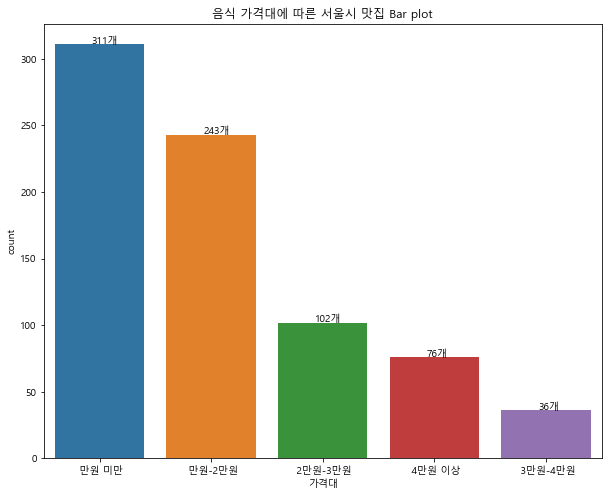

In [23]:
ordered_index = df.value_counts('가격대').index
plt.figure(figsize=(10, 8))
ax1 = sns.countplot(x='가격대', data=df, order=ordered_index)

plt.title('음식 가격대에 따른 서울시 맛집 Bar plot')
plt.xlabel('가격대')


for p in ax1.patches:
    ax1.annotate('{:.0f}개'.format(p.get_height()), (p.get_x() + 0.33, p.get_height() + 0.5))

In [8]:
i = 0
address = []

for i in range(len(df['주소'])):
    a = df.loc[i, '주소'].split(' ')
    address.append(" ".join(a[1:5]))

In [9]:
geo_local = Nominatim(user_agent='South Korea')

# 주소 -> 위도, 경도 반환
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [10]:
#####주소를 위,경도 값으로 변환하기 #####
latitude = []
longitude =[]
i = 0
for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [59]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in df.index:
    folium.Marker(
        [latitude[n],longitude[n]],
        radius = 10, 
        color='#3186cc',
        fill_color='#3186cc', 
        fill=True,
        tooltip  = ('<b>- 지역</b>: ' + df['구'][n] + '<br>' +
                 '<b>- 상호명</b>: ' + df['식당명'][n] + '<br>' + 
                    '<b>- 평점</b>: ' + str(round(df['평점'][n], 2)) + '<br>' + 
                 '<b>- 음식분류</b>: ' + df['음식종류'][n] + '<br>' + 
                   '<b>- 가격대</b>: ' + df['가격대'][n])
    ).add_to(map)
map

In [69]:
df1 = pd.DataFrame(df['구'].value_counts())
df1.rename(columns = {'구' : '맛집수'}, inplace = True)

In [73]:
#한국 지도 데이터 이용해서 단계 구분도 그리기
import json
#한국지도 경계의 json data 파일 가져오기
#한글이 포함된경우에는 그냥 path만 연결하면 인코딩 문제 발생
#json.load( encoding='utf-8') 이용해서 변수에 data 저장 후 사용하는 것이 일반적

geo_path='./data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))
# geo_str

#서울을 중심으로 기본 지도 출력
#위경도[37.5502,126.982]
map=folium.Map(location=[37.5502,126.982],
               zoom_start=11,)
               #tiles='Stamen Terrain')

# map

#단계 구분도 data 읽어오기
#csv 읽어오기 : pd.read_csv(경로포함파일명,encoding=,index_col='지정인덱스 필드명')
f_test=df1

In [29]:
map.choropleth(geo_data=geo_str,
               data=f_test,
               columns=[f_test.index,'맛집수'],
               key_on = 'feature.id',
               fill_color='BuPu',
               legend_name='구 별 맛집 수')
folium.LayerControl().add_to(map)
map

# 인구

In [4]:
Fin_df = pd.read_csv('./data/data_set/구별 인구수와 맛집수.csv')

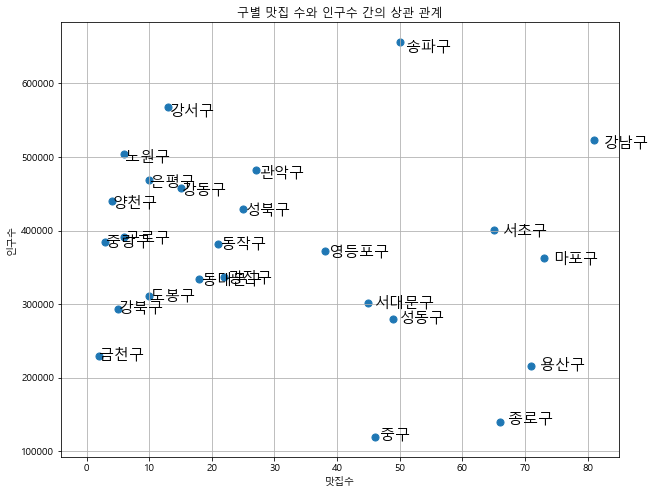

In [5]:
fp1 = np.polyfit(Fin_df['구별맛집수'], Fin_df['총 인구수'],1)
fp1

f1 = np.poly1d(fp1)
fx = np.linspace(0, 200, 1)

plt.figure(figsize=(10,8))
plt.scatter(Fin_df['구별맛집수'], Fin_df['총 인구수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(Fin_df['구별맛집수'][n]*1.02, Fin_df['총 인구수'][n]*0.98, 
             Fin_df.loc[n, '구'], fontsize=15)
    
plt.title("구별 맛집 수와 인구수 간의 상관 관계")   
plt.xlabel('맛집수')
plt.ylabel('인구수')
plt.grid()
plt.show()

In [6]:
print(pearsonr(Fin_df['구별맛집수'], Fin_df['총 인구수']))

(-0.16469139384870915, 0.4314614157202909)


In [24]:
df_pore = pd.read_csv('./data/인구수와리뷰수.csv')
df_pore.drop('Unnamed: 0', axis = 1, inplace = True)

Text(0.5, 1.0, '구별 인구수와 리뷰수의 상관관계')

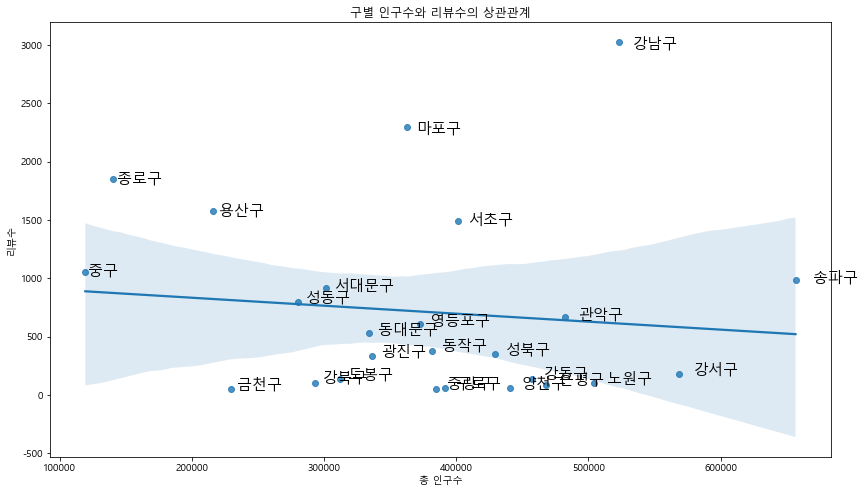

In [134]:
plt.figure(figsize=(14,8))
sns.regplot(x=df_pore['총 인구수'], y=df_pore['리뷰수'])
for n in range(25):
    plt.text(df_pore['총 인구수'][n]*1.02, df_pore['리뷰수'][n]*0.98, 
             df_pore.loc[n, '구'], fontsize=15)   
plt.title('구별 인구수와 리뷰수의 상관관계')
#Text(0.5, 1.0, '구별 인구수와 리뷰수의 상관관계')

In [31]:
print(pearsonr(df_pore['총 인구수'], df_pore['리뷰수']))

(-0.10967088469095203, 0.6017682368004513)


# 활동인구 / 사업체 / 인프라

In [19]:
population = pd.read_csv('./data/data_set/구별 사업체종사자수와 맛집수.csv')
company = pd.read_csv('./data/data_set/구별 사업체수와 맛집수.csv')

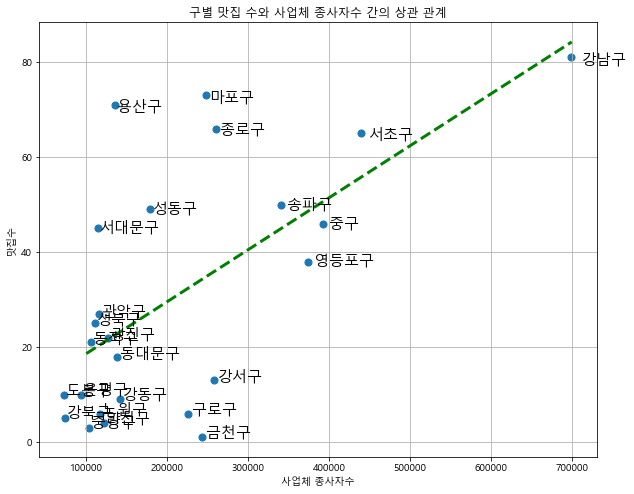

In [20]:
fp1 = np.polyfit(population['사업체종사자수'], population['맛집수'],1)
fp1

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(10,8))
plt.scatter(population['사업체종사자수'], population['맛집수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(population['사업체종사자수'][n]*1.02, population['맛집수'][n]*0.98, 
             population.loc[n, '구'], fontsize=15)
    
plt.title("구별 맛집 수와 사업체 종사자수 간의 상관 관계")   
plt.xlabel('사업체 종사자수')
plt.ylabel('맛집수')
plt.grid()
plt.show()

In [35]:
print(pearsonr(population['맛집수'], population['사업체종사자수']))

(0.6251416857877897, 0.0008339021081624285)


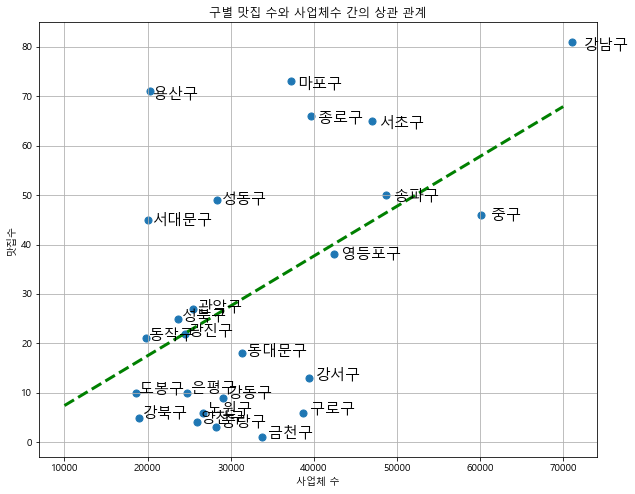

In [21]:
fp1 = np.polyfit(company['사업체수'], company['맛집수'],1)
fp1

f1 = np.poly1d(fp1)
fx = np.linspace(10000, 70000, 10)

plt.figure(figsize=(10,8))
plt.scatter(company['사업체수'], company['맛집수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(company['사업체수'][n]*1.02, company['맛집수'][n]*0.98, 
             company.loc[n, '구'], fontsize=15)
    
plt.title("구별 맛집 수와 사업체수 간의 상관 관계")   
plt.xlabel('사업체 수')
plt.ylabel('맛집수')
plt.grid()
plt.show()

In [36]:
print(pearsonr(company['맛집수'], company['사업체수']))

(0.5190069873532723, 0.007850065973888647)


In [14]:
df_sub = pd.read_csv('./data/data_set/맛집 인접역 추가(전체).csv')
sub_ex = pd.DataFrame(df_sub.인접역까지의거리.value_counts())
sub_ex.rename(columns = {'인접역까지의거리' : '인접역수'}, inplace = True)
sub_ex['인접역까지의거리'] = sub_ex.index

sub_ex = sub_ex.sort_values('인접역까지의거리')
sub_ex.reset_index(inplace = True, drop=True)
tmp = sub_ex[sub_ex['인접역수'] == 7].index
sub_ex = sub_ex.drop(tmp)

In [15]:
dis = sub_ex['인접역까지의거리'].to_list()
data = dis
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3]
labels = ['0.5이하', '1이하', '1.5이하', '2이하', '2.5이하', '3이하']
cats = pd.cut(data, bins, labels = labels)
cat_list = list(cats)

In [16]:
from collections import Counter
a = []
b = []
result = Counter(cat_list)

for key in result:
    a.append(key)
    b.append(result[key])

df_dis = pd.DataFrame((zip(a, b)), columns = ['거리', '수'])

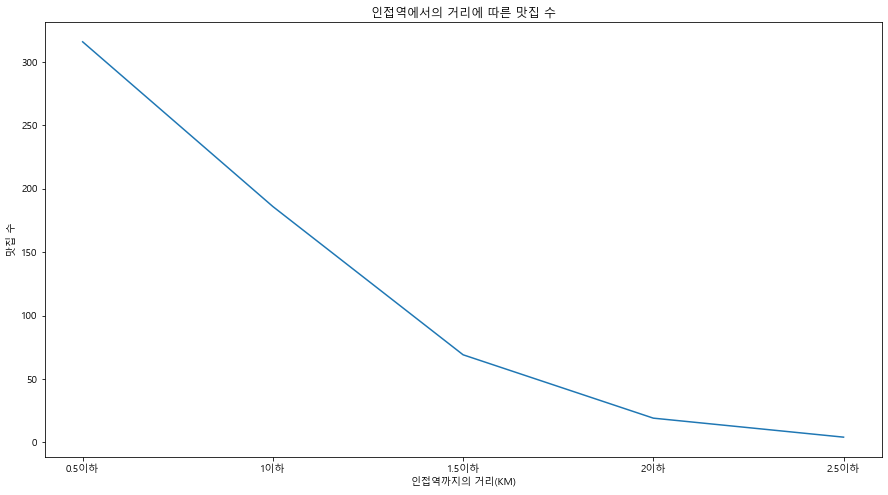

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(df_dis['거리'], df_dis['수'])

plt.xlabel('인접역까지의 거리(KM)')
plt.ylabel('맛집 수')
plt.title('인접역에서의 거리에 따른 맛집 수')
plt.show()

In [29]:
campus = pd.read_csv('./data/맛집 데이터 인접 대학교 추가.csv')

In [31]:
ex1 = pd.DataFrame(campus.인접대학교까지의거리.value_counts())
ex1.rename(columns = {'인접대학교까지의거리' : '인접대학수'}, inplace = True)
ex1['인접대학교까지의거리'] = ex1.index

ex1 = ex1.sort_values('인접대학교까지의거리')
ex1.reset_index(inplace = True, drop=True)
tmp = ex1[ex1['인접대학수'] == 7].index
ex1 = ex1.drop(tmp)

In [32]:
dis = ex1['인접대학교까지의거리'].to_list()
data = dis
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
labels = ['0.5이하', '1이하', '1.5이하', '2이하', '2.5이하', '3이하', '3.5이하', '4이하', '4.5이하']
cats = pd.cut(data, bins, labels = labels)
cat_list = list(cats)

In [34]:
from collections import Counter
a = []
b = []
result = Counter(cat_list)

for key in result:
    a.append(key)
    b.append(result[key])

df_cam = pd.DataFrame((zip(a, b)), columns = ['거리', '수'])
df_cam = df_cam.drop(0, axis = 0)

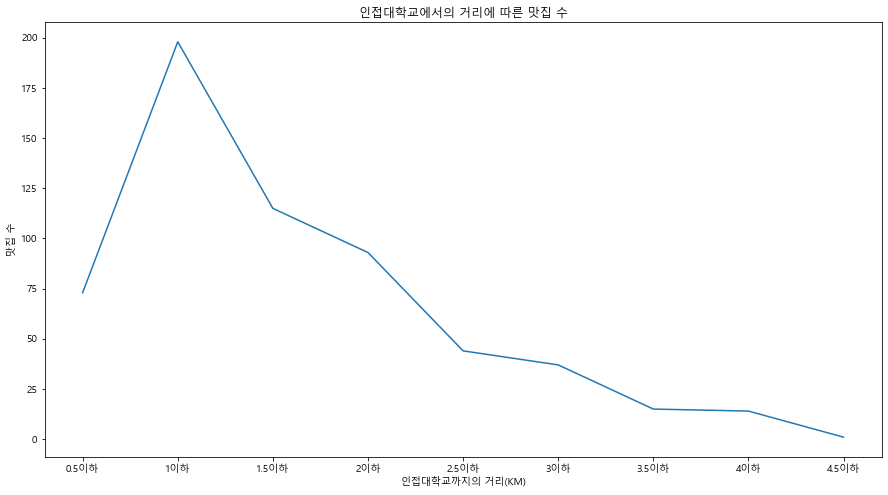

In [36]:
plt.figure(figsize=(15, 8))
plt.plot(df_cam['거리'], df_cam['수'])

plt.xlabel('인접대학교까지의 거리(KM)')
plt.ylabel('맛집 수')
plt.title('인접대학교에서의 거리에 따른 맛집 수')
plt.show()

# 소득(GDP)

In [26]:
df_GDP_medien = pd.read_csv('./data/GDP와평균가격.csv')
df_GDP_medien.drop('Unnamed: 0', axis=1,inplace=True)

Text(0.5, 1.0, '구별 gdp와 맛집의 평균 가격의 관계')

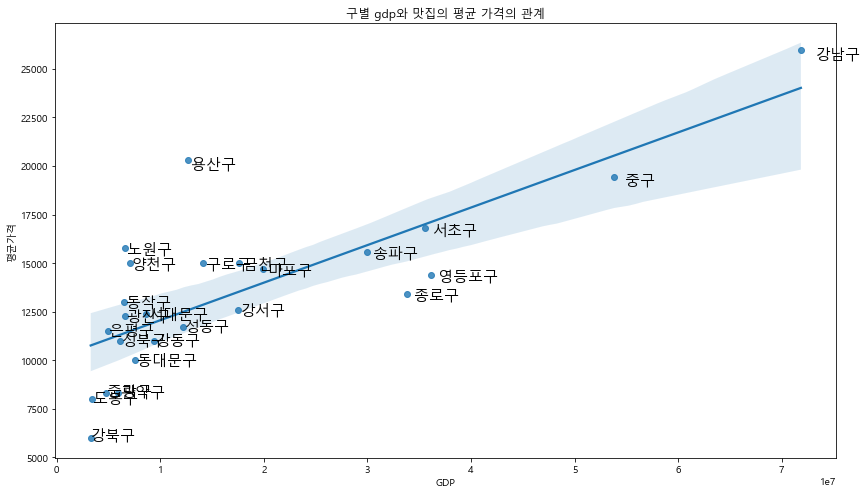

In [135]:
plt.figure(figsize=(14,8))
sns.regplot(x=df_GDP_medien['GDP'], y=df_GDP_medien['평균가격'])
for n in range(25):
    plt.text(df_GDP_medien['GDP'][n]*1.02, df_GDP_medien['평균가격'][n]*0.98, 
             df_GDP_medien.loc[n, '구'], fontsize=15)  
plt.title('구별 gdp와 맛집의 평균 가격의 관계')
#Text(0.5, 1.0, '구별 인구수와 리뷰수의 상관관계')

In [32]:
print(pearsonr(df_GDP_medien['GDP'], df_GDP_medien['평균가격']))

(0.7749689355226355, 5.40298412780003e-06)


In [28]:
df_GDP_price = pd.read_csv('./data/GDP와가격점수.csv')
df_GDP_price.drop('Unnamed: 0', axis=1,inplace=True)

Text(0.5, 1.0, '구별 gdp와 맛집의 가격점수의 관계')

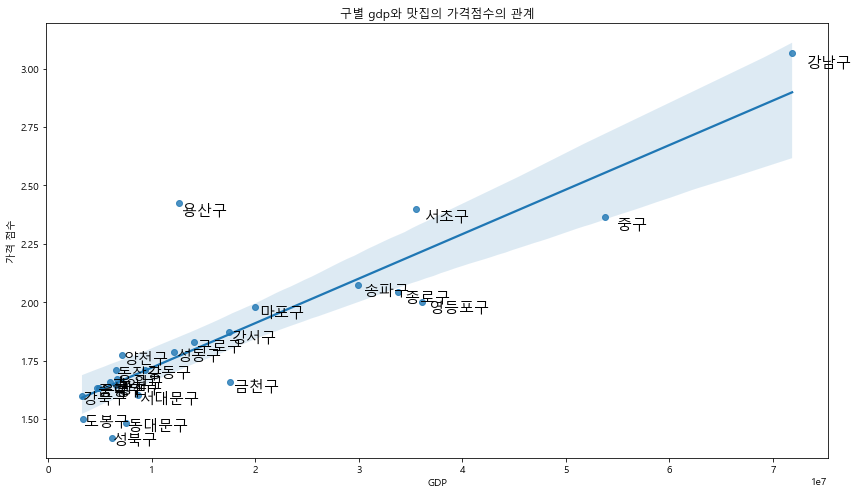

In [140]:
plt.figure(figsize=(14,8))
sns.regplot(x=df_GDP_price['GDP'], y=df_GDP_price['가격 점수'])
for n in range(25):
    plt.text(df_GDP_price['GDP'][n]*1.02, df_GDP_price['가격 점수'][n]*0.98, 
             df_GDP_price.loc[n, '구'], fontsize=15)  
plt.title('구별 gdp와 맛집의 가격점수의 관계')

In [33]:
print(pearsonr(df_GDP_price['GDP'], df_GDP_price['가격 점수']))

(0.8789649046326994, 7.429293031312685e-09)


In [44]:
df_tax = pd.read_csv('./data/소득세와 맛집수.csv')

Text(0.5, 1.0, '구별 맛집 수와 소득세 간의 상관 관계')

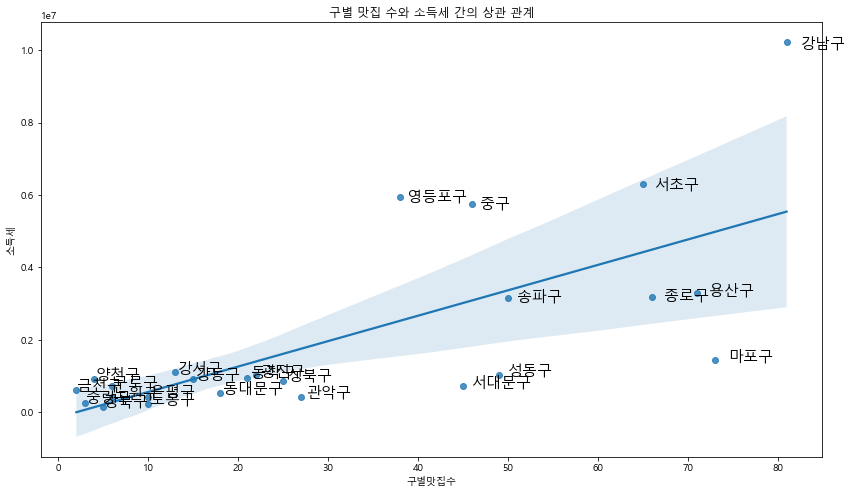

In [142]:
plt.figure(figsize=(14,8))
sns.regplot(x=df_tax['구별맛집수'], y=df_tax['소득세'])
for n in range(25):
    plt.text(df_tax['구별맛집수'][n]*1.02, df_tax['소득세'][n]*0.98, 
             df_tax.loc[n, '구'], fontsize=15)  
plt.title("구별 맛집 수와 소득세 간의 상관 관계")  

In [48]:
print(pearsonr(df_tax['구별맛집수'], df_tax['소득세']))

(0.7081861588087626, 7.467343220764394e-05)


In [164]:
tax_score_all = pd.read_csv('./data/소득세와가격점수.csv')

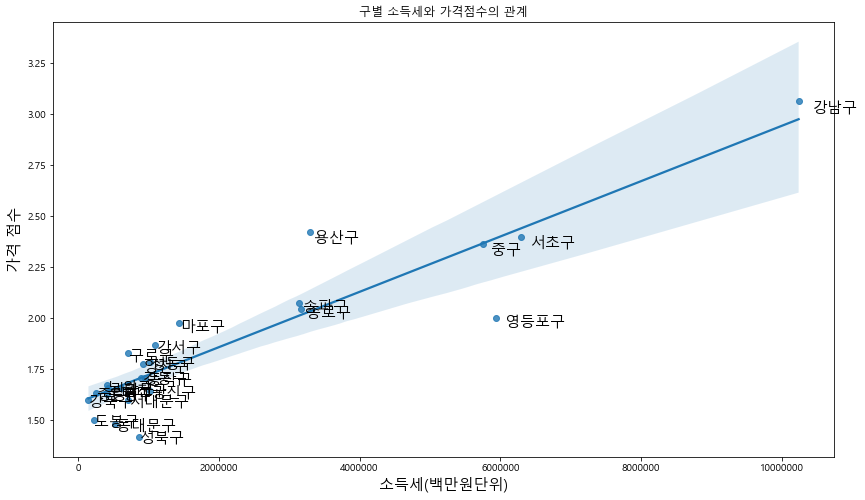

In [174]:
plt.figure(figsize=(14,8))
sns.regplot(x=tax_score_all['소득세'], y=tax_score_all['가격 점수'])
for n in range(25):
    plt.text(tax_score_all['소득세'][n]*1.02, tax_score_all['가격 점수'][n]*0.98, 
             tax_score_all.loc[n, '구'], fontsize=15)  
plt.title("구별 소득세와 가격점수의 관계") 
plt.xlabel('소득세(백만원단위)',fontsize=15)
plt.ylabel('가격 점수',fontsize=15)
plt.ticklabel_format(axis='x',useOffset=False, style='plain')

In [170]:
print(pearsonr(tax_score_all['소득세'], tax_score_all['가격 점수']))

(0.9144750319019931, 1.6386374859486384e-10)


In [166]:
tax_score = pd.read_csv('./data/소득세와맛집가격점수.csv')

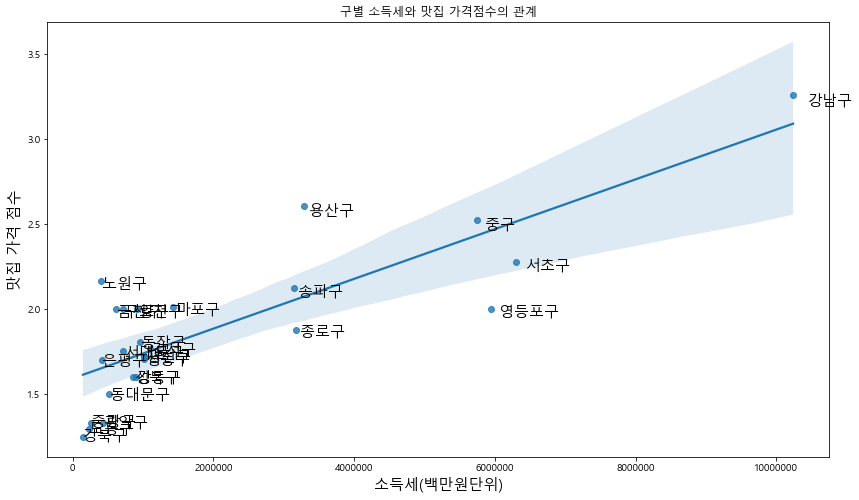

In [175]:
plt.figure(figsize=(14,8))
sns.regplot(x=tax_score['소득세'], y=tax_score['가격 점수'])
for n in range(25):
    plt.text(tax_score['소득세'][n]*1.02, tax_score['가격 점수'][n]*0.98, 
             tax_score.loc[n, '구'], fontsize=15)  
plt.title("구별 소득세와 맛집 가격점수의 관계")   
plt.xlabel('소득세(백만원단위)',fontsize=15)
plt.ylabel('맛집 가격 점수',fontsize=15)
plt.ticklabel_format(axis='x',useOffset=False, style='plain')

In [171]:
print(pearsonr(tax_score['소득세'], tax_score['가격 점수']))

(0.8102921219978414, 9.143644894293959e-07)
